In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
big_train=pd.read_csv('train_bigmart_sales.csv')
big_train.isnull().sum()/ big_train.shape[0] * 100.00

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [3]:
big_test=pd.read_csv('test_BigMartSales.csv')
big_test.isnull().sum()/big_test.shape[0]*100.00

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

<AxesSubplot:>

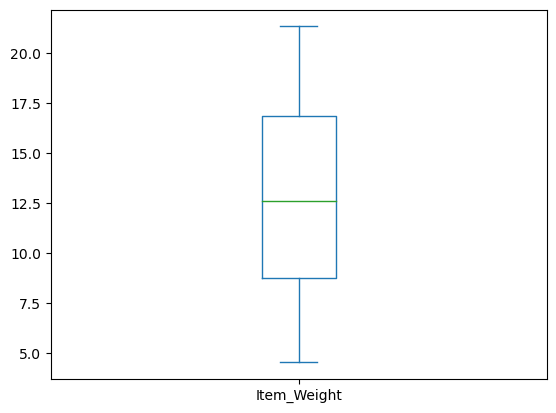

In [4]:
big_train.Item_Weight.plot.box()

In [5]:
big_train.Item_Weight=big_train.Item_Weight.fillna(big_train.Item_Weight.mean())
big_train.isnull().sum()
big_train.Outlet_Size=big_train.Outlet_Size.fillna(big_train.Outlet_Size.mode()[0])
big_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

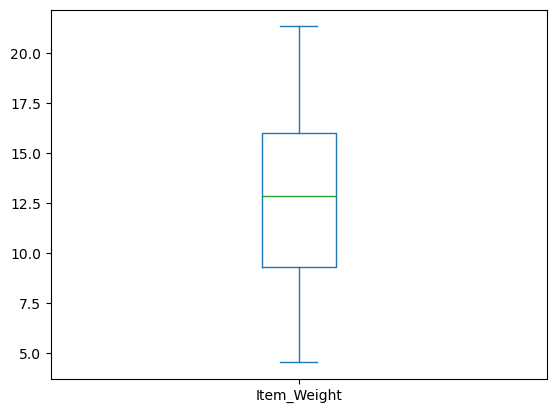

In [6]:
big_train.Item_Weight.plot.box()

In [7]:
big_test.Item_Weight=big_test.Item_Weight.fillna(big_train.Item_Weight.mean())
big_test.isnull().sum()
big_test.Outlet_Size=big_test.Outlet_Size.fillna(big_train.Outlet_Size.mode()[0])
big_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

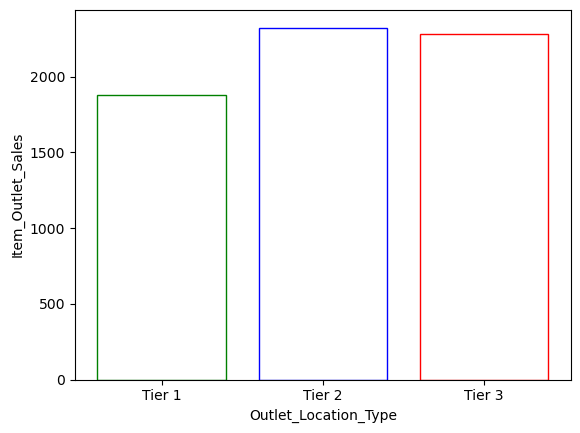

In [8]:
plt.bar(big_train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().index.tolist(),big_train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().tolist(),color=('white'),edgecolor=('green','blue','red'))
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

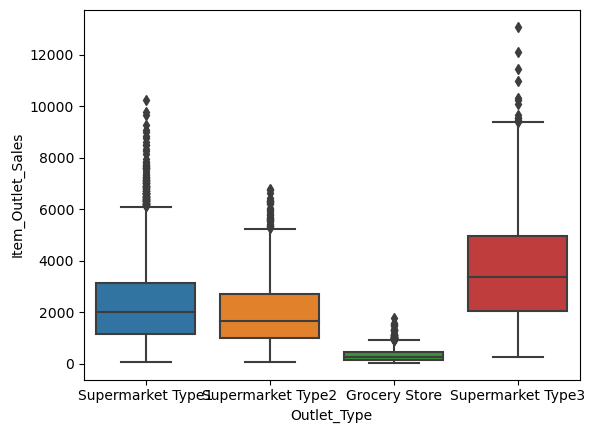

In [9]:
sns.boxplot(data=big_train,x='Outlet_Type',y='Item_Outlet_Sales')

In [10]:
def Correction_1(data,n):
    q1,q3=np.percentile(data[n],[25,75])
    low=q1-(1.5)*data[n].std()
    high=q3+(1.5)*data[n].std()
    for i in range(0,len(data)):
        if data[n][i]<low:
            data[n][i]=low
        elif data[n][i]>high:
            data[n][i]=high
        else:
            data[n][i]=data[n][i]
            
    return data[n]

<AxesSubplot:>

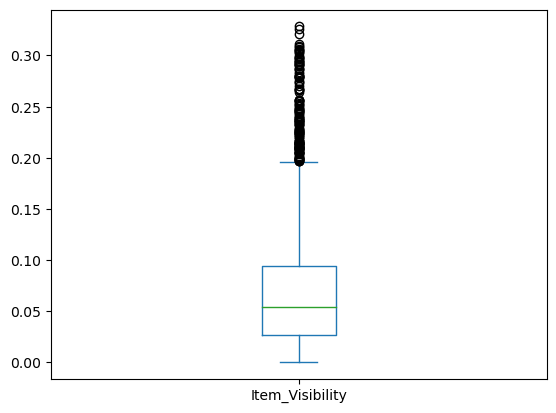

In [11]:
big_train.Item_Visibility.plot.box()

In [12]:
big_train.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [13]:
Correction_1(big_train,'Item_Visibility')

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

<AxesSubplot:>

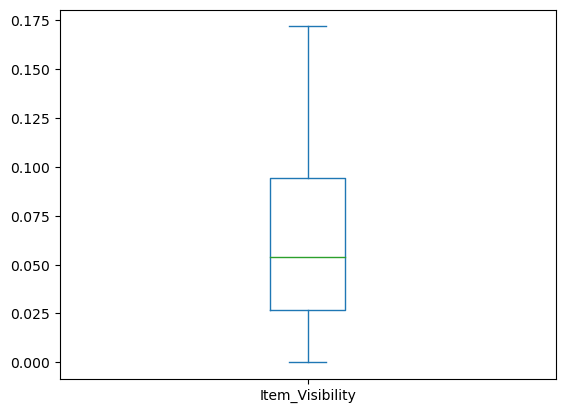

In [14]:
big_train.Item_Visibility.plot.box()

In [15]:
big_train.select_dtypes(include=[np.number]).head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [16]:
oh=OneHotEncoder()
enc=oh.fit_transform(big_train[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']]).toarray()
new_data=pd.DataFrame(enc)
big_train=big_train.join(new_data)

In [17]:
big_train=big_train.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])



<AxesSubplot:>

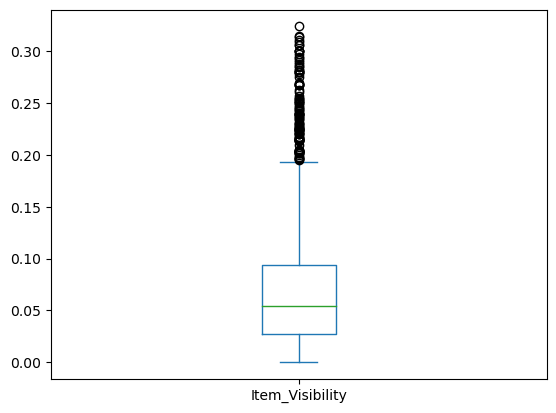

In [18]:
big_test.Item_Visibility.plot.box()

In [19]:
Correction_1(big_test,'Item_Visibility')

0       0.007565
1       0.038428
2       0.099575
3       0.015388
4       0.118599
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.000000
5680    0.104720
Name: Item_Visibility, Length: 5681, dtype: float64

<AxesSubplot:>

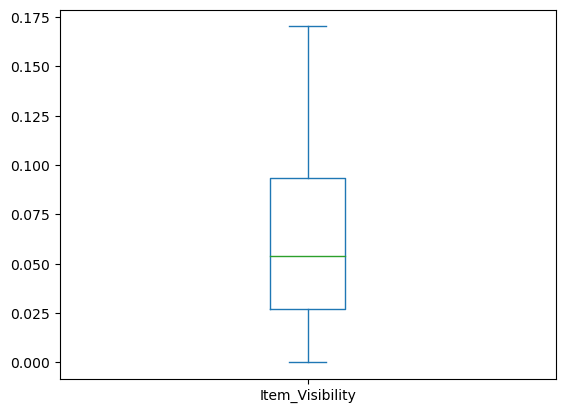

In [20]:
big_test.Item_Visibility.plot.box()

In [21]:
#TestData_Encoding
enc_t=oh.fit_transform(big_test[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']]).toarray()
new_data_test=pd.DataFrame(enc_t)
big_test=big_test.join(new_data_test)
big_test=big_test.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [22]:
x=big_train.drop(columns='Item_Outlet_Sales')
y=big_train['Item_Outlet_Sales']


In [23]:
mx=MinMaxScaler()
pd.DataFrame(mx.fit_transform(x))

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.282525,0.093308,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.112094,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.097452,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.330170,0.777729,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,0.227746,0.273182,0.326263,0.708333,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,0.359929,0.204593,0.228492,0.791667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,0.158083,0.844394,0.304939,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [25]:
m1=LinearRegression()
m1.fit(x_train,y_train)
pred_m1=m1.predict(x_test)
pred_m1

array([ 2455.66172971,  2539.06162596,  2248.36726468, ...,
        4267.98820132, -1069.23444807,  5425.73913695])

In [26]:
m2=SVR()
m2.fit(x_train,y_train)
pred_m2=m2.predict(x_test)
pred_m2


array([1794.00586959, 1783.56905821, 1790.71928472, ..., 1805.32009783,
       1782.47837469, 1803.57857518])

In [27]:
m3=DecisionTreeRegressor()
m3.fit(x_train,y_train)
pred_m3=m3.predict(x_test)
pred_m3

array([4102.6596,  958.752 , 3340.9844, ..., 8132.0812,  107.8596,
       3185.1872])

In [28]:
m4=RandomForestRegressor()
m4=RandomForestRegressor(n_estimators=100,max_depth=3,max_features=5,criterion='squared_error')
m4.fit(x_train,y_train)
pred_m4=m4.predict(x_test)
pred_m4

array([2566.01961197, 2625.52683101, 1963.72417591, ..., 2653.88812024,
        815.73796032, 3295.29513043])

In [29]:
r2(m1.predict(x_test),y_test)

0.20816477976549208

In [30]:
mse(m1.predict(x_test),y_test)

1283889.9630710562

In [31]:
mae(m1.predict(x_test),y_test)

853.4267060886503

In [32]:
mape(m1.predict(x_test),y_test)

0.5505926435166668

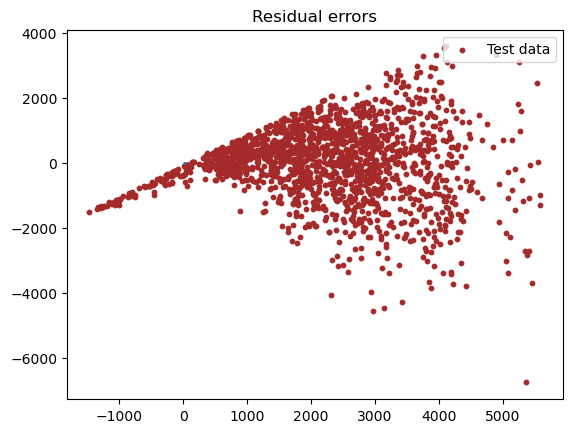

In [33]:
#Ploting Error by Linear Regression Model
plt.scatter(m1.predict(x_test), m1.predict(x_test) - y_test,
            color = "brown", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [34]:
print(mae(m2.predict(x_test),y_test))
print(mse(m2.predict(x_test),y_test))
print(mape(m2.predict(x_test),y_test))
print(r2(m2.predict(x_test),y_test))


1334.025142579145
3072540.6724148355
0.7434635280062513
-67424.11668226896


In [35]:
print(mae(m3.predict(x_test),y_test))
print(mse(m3.predict(x_test),y_test))
print(mape(m3.predict(x_test),y_test))
print(r2(m3.predict(x_test),y_test))

1040.6614104398827
2152819.7435231195
0.6963701672614125
0.25150240139121716


In [36]:
print(mae(m4.predict(x_test),y_test))
print(mse(m4.predict(x_test),y_test))
print(mape(m4.predict(x_test),y_test))
print(r2(m4.predict(x_test),y_test))

1091.2878312989315
1938867.6398548943
0.5075247865206174
-5.972673243665622


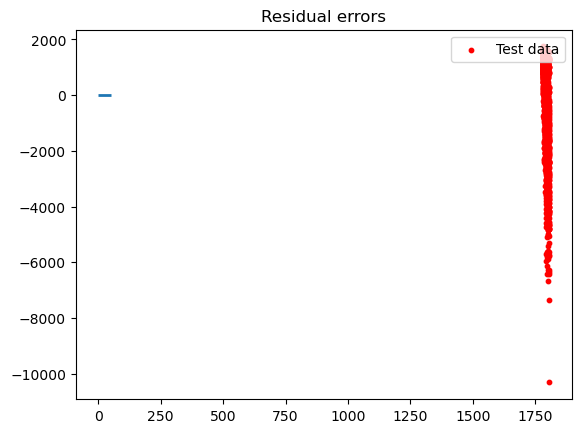

In [37]:
#Ploting Error by SVM Model
plt.scatter(m2.predict(x_test), m2.predict(x_test) - y_test,
            color = "red", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

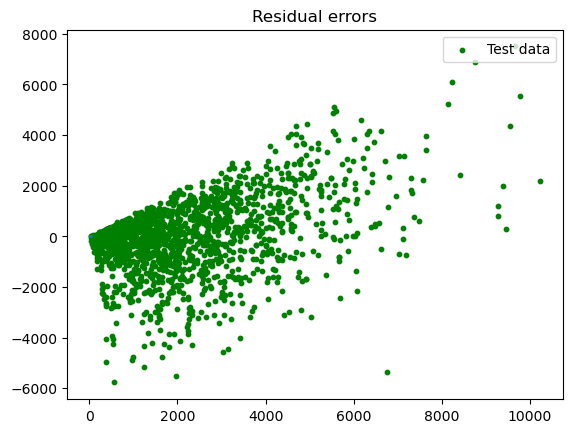

In [38]:
#Ploting Error by DecisionTree Model
plt.scatter(m3.predict(x_test), m3.predict(x_test) - y_test,
            color = "green", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

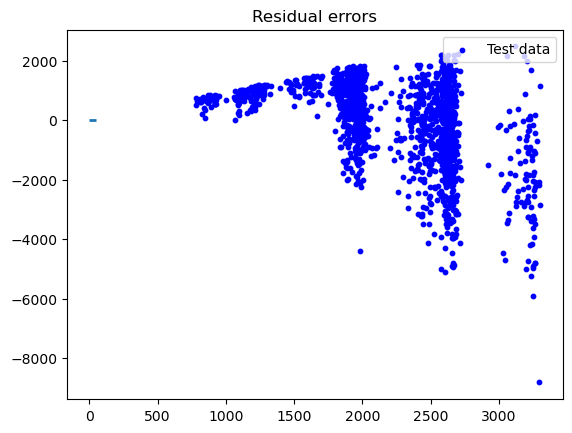

In [39]:
#Ploting Error by RandomForest Model
plt.scatter(m4.predict(x_test), m4.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [40]:
pred_m3

array([4102.6596,  958.752 , 3340.9844, ..., 8132.0812,  107.8596,
       3185.1872])

In [41]:
#Model M2 i.e SVM is Selected
#Final_Training
m2.fit(x,y)
BigPred_m2=m2.predict(big_test)
BigPred_m2


array([1787.1193892 , 1784.31271744, 1805.3757211 , ..., 1788.60437426,
       1801.6933738 , 1783.28644995])

In [42]:
big_test_1=pd.read_csv('test_BigMartSales.csv')

In [43]:
big_test_1['Item_Outlet_Sales']=BigPred_m2

In [44]:
submission=big_test_1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [45]:
submission.to_csv('submission.csv')

In [47]:
#Model M3 i.e Decision Tree is Selected
#Final_Training
m2.fit(x,y)
BigPred_m3=m3.predict(big_test)
BigPred_m3

array([2992.771 , 1193.1136,  484.7024, ..., 1969.4364, 7247.233 ,
       1728.4168])

In [48]:
big_test_2=pd.read_csv('test_BigMartSales.csv')

In [49]:
big_test_2['Item_Outlet_Sales']=BigPred_m3

In [50]:
submission=big_test_2[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [51]:
submission.to_csv('submission_1.csv')

In [57]:
#Model M4 is Selected
#Final_Training
m1.fit(x,y)
BigPred_m4=m4.predict(big_test)
BigPred_m4

array([1967.92269111, 1940.41767821, 1633.46206369, ..., 1940.96325534,
       2716.97732773, 1963.52949514])

In [58]:
big_test_3=pd.read_csv('test_BigMartSales.csv')

In [59]:
big_test_3['Item_Outlet_Sales']=BigPred_m4

In [60]:
submission=big_test_3[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [61]:
submission.to_csv('submission_3.csv')